<a href="https://colab.research.google.com/github/sunyingjian/-Logging-related-network/blob/master/%E7%94%B5%E9%98%BB%E7%8E%87%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<code>function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-connect-button").click() 
}setInterval(ClickConnect,6000)</code>

In [ ]:
#@markdown <h3>← 输入了代码后运行以防止断开</h>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


##准备数据

In [ ]:
! git clone https://github.com/sunyingjian/numpy-.git
!git clone https://github.com/RRdmlearning/Machine-Learning-From-Scratch.git
!git clone https://github.com/Jack-Cherish/Machine-Learning.git
! git clone https://github.com/seg/tutorials-2016.git

fatal: destination path 'numpy-' already exists and is not an empty directory.
fatal: destination path 'Machine-Learning-From-Scratch' already exists and is not an empty directory.
fatal: destination path 'Machine-Learning' already exists and is not an empty directory.
Cloning into 'tutorials-2016'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161
Receiving objects: 100% (161/161), 16.86 MiB | 7.19 MiB/s, done.
Resolving deltas: 100% (64/64), done.


##导入谷歌云端硬盘

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##开始

In [ ]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
import seaborn as sns
from sklearn import  model_selection
import statsmodels.api as sm
import statsmodels.formula.api as smf
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
training_data = pd.read_csv('/content/numpy-/3345train data.csv')
training_data
testing_data = pd.read_csv('/content/numpy-/3345test_data.csv')
all_data = pd.read_csv('/content/numpy-/延安油田总数居.csv')
all_data

,AC,CAL,GR,K,RD,SP,Core Lithology
0,0.029102,0.031789,0.026724,0.202335,0.078986,0.333754,5
1,0.032883,0.033469,0.030592,0.203141,0.076064,0.333669,5
2,0.034385,0.037006,0.032359,0.200121,0.074503,0.333619,5
3,0.243816,0.143381,0.086581,0.290115,0.017649,0.094025,3
4,0.248043,0.146786,0.084643,0.283874,0.017286,0.090554,3
...,...,...,...,...,...,...,...
3706,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936,6
3707,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809,3
3708,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486,5
3709,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641,6


##根据数据集建模

In [ ]:
model = smf.ols(formula='RD~AC+CAL+GR+K+SP',data=training_data).fit()
print(f'模型的偏回归系数为{model.params}\n')

模型的偏回归系数为Intercept    0.137135
AC          -0.197023
CAL          0.003628
GR           0.005497
K           -0.127530
SP          -0.008810
dtype: float64



##针对测试集进行处理

In [ ]:
#删除要预测的RD变量
test_data = testing_data.drop(['Core Lithology'], axis=1)
test_data = test_data.drop(['RD'],axis=1)
pred = model.predict(exog=test_data)
print('对比预测值和实际值的差异:\n',pd.DataFrame({'Prediction':pred,'Real':testing_data.RD}))

对比预测值和实际值的差异:
      Prediction      Real
0      0.110352  0.001420
1      0.041023  0.002744
2     -0.003096  0.003874
3      0.037381  0.003290
4      0.040767  0.003455
..          ...       ...
361    0.086554  0.281687
362    0.101816  0.282093
363    0.117388  0.359737
364    0.109401  0.803566
365    0.108443  0.891134

[366 rows x 2 columns]


##回归模型的假设检验

我们要证明针对于电阻率得预测确实可以使用多元线性回归进行预测

In [ ]:
#计算建模中的因变量均值
ybar = training_data.RD.mean()
ybar

0.04917119512705526

In [ ]:
#统计变量个数与观测个数
p=model.df_model
n=training_data.shape[0]
p

5.0

In [ ]:
##计算回归离差平方和
RSS=np.sum((model.fittedvalues-ybar)**2)
RSS

4.392695973369205

In [ ]:
#计算误差平方和
ESS = np.sum(model.resid**2)
ESS

21.028772415264456

In [ ]:
#计算F值
F = (RSS/p)/(ESS/(n-p-1))
F

139.49660555965764

In [ ]:
#一行代码解决求f
f= model.fvalue
f

139.49660555965656

In [ ]:
#计算f值得理论值
from scipy.stats import f
F_Theroy = f.ppf(q=0.95, dfn=p, dfd = n-p-1)
F_Theroy

2.2167769775463118

##到底哪些变量可以影响电阻率建模呢

模型的概览信息包含三个部分，第一部分主要是有关模型的信息，例如模型的判决系数R2，用来衡量自变量对因变量的解释程度，模型的F统计值，用来检验模型的显著性；第二部分主要包含偏回归系数的信息，例如回归系数的Coef、t统计量值、回归系数的置信区间等；第三部分主要涉及模型的误差项e的有关信息。

在第二部分的内容中，含有每个偏回归系数的t统计量值，它的计算就是由估计值coef和标准差std err的商所得的，同时也有t统计量值对应的概率值p，用来判别统计量是否显著的直接办法，通常概率值p小于0.05时表示拒绝原假设。

所以我们发现真正对于电阻率RD回归有影响的变量有CAL,GR,SP

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RD   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          1.06e-134
Time:                        08:30:46   Log-Likelihood:                 3732.1
No. Observations:                3345   AIC:                            -7452.
Df Residuals:                    3339   BIC:                            -7416.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1371      0.004     31.218      0.000       0.129       0.146
AC            -0.1970      0.016    -12.626      0.000      -0.228      -0.166
CAL            0.0036      0.012      0.303      0.762      -0.020       0.027
GR             0.0055      0.021      0.264      0.791      -0.035       0.046
K             -0.1275      0.012    -10.676      0.000      -0.151      -0.104
SP            -0.0088      0.007     -1.226      0.220      -0.023       0.005
==============================================================================
Omnibus:                     3617.046   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           258858.581
Skew:                           5.494   Prob(JB):                         0.00
Kurtosis:                      44.672   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##回归诊断

当回归模型建好之后，并不意味着建模过程的结束，还需要进一步对模型进行诊断。由统计学知识可知，线性回归模型需要满足一些假设前提，只有满足了这些假设，模型才是合理的。需满足：误差e服从正态分布，无多重共线性，线性相关性，误差项e的独立性，方差齐性。

正态性检验，由y=Xβ+e来说，等式右边的自变量属于已知变量，而等式左边的因变量服从正态分布，要求残差项要求正态分布，但其实质就是要求因变量服从正态分布。关于正态性检验通常运用两类方法，分别是定性的图形法（直方图、PP图或QQ图）和定量的非参数法（Shapiro检验和K-S检验），以下是直方图法，

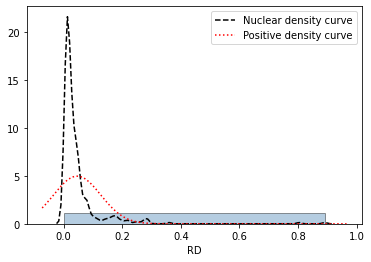

In [74]:
import scipy.stats as st
sns.distplot(a=testing_data.RD,bins=1,fit=st.norm,norm_hist=True,
             hist_kws={'color':'steelblue','edgecolor':'black'},
             kde_kws = {'color':'black','linestyle':'--','label':'Nuclear density curve'},
             fit_kws = {'color':'red','linestyle':':','label':'Positive density curve'})
plt.legend()
plt.show()

##多元线性回归

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Machine-Learning-From-Scratch-master')

In [ ]:
X = all_data.drop(['RD','Core Lithology'],axis=1)
y = all_data['RD'].values

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from utils import train_test_split
from utils import mean_squared_error, Plot

# L1正则化
class l1_regularization():
    def __init__(self, alpha):
        self.alpha = alpha

    # L1正则化的方差
    def __call__(self, w):
        loss = np.sum(np.fabs(w))
        return self.alpha * loss

    # L1正则化的梯度
    def grad(self, w):
        return self.alpha * np.sign(w)


# L2正则化
class l2_regularization():
    def __init__(self, alpha):
        self.alpha = alpha

    # L2正则化的方差
    def __call__(self, w):
        loss = w.T.dot(w)
        return self.alpha * 0.5 * float(loss)

    # L2正则化的梯度
    def grad(self, w):
        return self.alpha * w


class LinearRegression():
    """
    Parameters:
    -----------
    n_iterations: int
        梯度下降的轮数
    learning_rate: float
        梯度下降学习率
    regularization: l1_regularization or l2_regularization or None
        正则化
    gradient: Bool
        是否采用梯度下降法或正规方程法。
        若使用了正则化，暂只支持梯度下降
    """

    def __init__(self, n_iterations=3000, learning_rate=0.00005, regularization=None, gradient=True):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.gradient = gradient
        if regularization == None:
            self.regularization = lambda x: 0
            self.regularization.grad = lambda x: 0
        else:
            self.regularization = regularization

    def initialize_weights(self, n_features):
        # 初始化参数
        limit = np.sqrt(1 / n_features)
        w = np.random.uniform(-limit, limit, (n_features, 1))
        b = 0
        self.w = np.insert(w, 0, b, axis=0)

    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.initialize_weights(n_features)
        X = np.insert(X, 0, 1, axis=1)
        y = np.reshape(y, (m_samples, 1))
        self.training_errors = []
        if self.gradient == True:
            # 梯度下降
            for i in range(self.n_iterations):
                y_pred = X.dot(self.w)
                loss = np.mean(0.5 * (y_pred - y) ** 2) + self.regularization(self.w) #计算loss
                # print(loss)
                self.training_errors.append(loss)
                w_grad = X.T.dot(y_pred - y) + self.regularization.grad(self.w)  # (y_pred - y).T.dot(X)，计算梯度
                self.w = self.w - self.learning_rate * w_grad #更新权值w
        else:
            # 正规方程
            X = np.matrix(X)
            y = np.matrix(y)
            X_T_X = X.T.dot(X)
            X_T_X_I_X_T = X_T_X.I.dot(X.T)
            X_T_X_I_X_T_X_T_y = X_T_X_I_X_T.dot(y)
            self.w = X_T_X_I_X_T_X_T_y

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred





def main():
	
    X_train=training_data.drop(['RD','Core Lithology'],axis=1)
    y_train = training_data['RD'].values
    X_test = testing_data.drop(['RD','Core Lithology'],axis=1)
    y_test = testing_data['RD'].values
    n_samples, n_features = np.shape(X)

    # 可自行设置模型参数，如正则化，梯度下降轮数学习率等
    model = LinearRegression(n_iterations=3000, regularization=l2_regularization(alpha=0.5))

    model.fit(X_train, y_train)

    # Training error plot 画loss的图
    n = len(model.training_errors)
    training, = plt.plot(range(n), model.training_errors, label="Training Error")
    plt.legend(handles=[training])
    plt.title("Error Plot")
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Iterations')
    plt.show()

    y_pred = model.predict(X_test)
    y_pred = np.reshape(y_pred, y_test.shape)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %s" % (mse))

    y_pred_line = model.predict(X)

    # Color map
    cmap = plt.get_cmap('viridis')

    # Plot the results，画拟合情况的图
    m1 = plt.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(366 * X, y_pred_line, color='black', linewidth=2, label="Prediction")
    plt.suptitle("Linear Regression")
    plt.title("MSE: %.2f" % mse, fontsize=10)
    plt.xlabel('Day')
    plt.ylabel('Temperature in Celcius')
    plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
    plt.show()


if __name__ == "__main__":
    main()

ValueError: ignored

##岭回归

In [ ]:
from numpy import genfromtxt
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# X为特征，Y为结果
X = X_train
Y = y_train


# 预测模型
regression_equation = linear_model.LinearRegression()
regression_equation.fit(X,Y)
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, y_test.shape)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %s" % (mse))

# print('系数为')
# print(regression_equation.coef_)
# print('截面或截距为')
# print(regression_equation.intercept_)

# 为三维图准备数据，x,y,z为三维坐标值
xs = []
ys = []
zs = []
zs_predict = []

for x in X_test:
    xs.append(x[0])
    ys.append(x[1])
    x = np.array(x).reshape(1, -1)
    predict = regression_equation.predict(x)
    zs_predict.append(predict[0])

for z in y_test:
    zs.append(z)


# 训练集坐标数据
xs_train = []
ys_train = []
zs_train = Y
for x in X:
    xs_train.append(x[0])
    ys_train.append(x[1])

# 绘制3D散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=20, c='blue', depthshade=True)
ax.scatter(xs, ys, zs_predict, s=20, c='red', depthshade=True)
ax.scatter(xs_train, ys_train, zs_train, s=35, c='black', depthshade=True, marker='+')

ax.set_xlabel('Traffic load')
ax.set_ylabel('Forwarding load threshold')
ax.set_zlabel('Hot spot proportional threshold')

plt.show()


NameError: ignored